## Loading the dataset in a frame

In [2]:
import pandas as pd

# Load the dataset
file_path = "Dataset .csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

(None,
    Restaurant ID         Restaurant Name  Country Code              City  \
 0        6317637        Le Petit Souffle           162       Makati City   
 1        6304287        Izakaya Kikufuji           162       Makati City   
 2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
 3        6318506                    Ooma           162  Mandaluyong City   
 4        6314302             Sambo Kojin           162  Mandaluyong City   
 
                                              Address  \
 0  Third Floor, Century City Mall, Kalayaan Avenu...   
 1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
 2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
 3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
 4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
 
                                      Locality  \
 0   Century City Mall, Poblacion, Makati City   
 1  Little Tokyo, Legaspi Village, Makati City   
 2  Edsa Shangri-La, Ortigas, Manda

## Install heatmap visualization library

In [3]:
!pip install folium

## Giving values to the heatmap

In [4]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the average coordinates
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=5)

# Add a heatmap layer
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(restaurant_map)


restaurant_map

## top 10 cities of the highest restraunt count

In [5]:
# Group by city and count the number of restaurants in each city
city_counts = df["City"].value_counts().reset_index()
city_counts.columns = ["City", "Restaurant Count"]

# Display the top 10 cities with the highest number of restaurants
city_counts.head(10)


,City,Restaurant Count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Bhubaneshwar,21
6,Amritsar,21
7,Ahmedabad,21
8,Lucknow,21
9,Guwahati,21


## the average ratings, cuisines, and price ranges by city

In [6]:
# Calculate average ratings and price range by city
city_stats = df.groupby("City").agg(
    Avg_Rating=("Aggregate rating", "mean"),
    Avg_Price_Range=("Price range", "mean")
).reset_index()

# Merge with restaurant count data
city_analysis = city_counts.merge(city_stats, on="City")

# Display top 10 cities with highest average ratings
city_analysis.sort_values(by="Avg_Rating", ascending=False).head(10)


,City,Restaurant Count,Avg_Rating,Avg_Price_Range
88,Inner City,2,4.900000,4.00
114,Quezon City,1,4.800000,3.00
91,Makati City,2,4.650000,3.00
85,Pasig City,3,4.633333,3.00
84,Mandaluyong City,4,4.625000,3.75
109,Beechworth,1,4.600000,2.00
47,London,20,4.535000,3.00
83,Taguig City,4,4.525000,3.50
116,Lincoln,1,4.500000,2.00
112,Tagaytay City,1,4.500000,3.00


## the most common cuisines offered in different cities

In [7]:
# Explode the cuisines column to count occurrences
df["Cuisines"] = df["Cuisines"].astype(str)  # Ensure all values are strings
df_exploded = df.assign(Cuisines=df["Cuisines"].str.split(", ")).explode("Cuisines")

# Count the number of times each cuisine appears in each city
cuisine_counts = df_exploded.groupby(["City", "Cuisines"]).size().reset_index(name="Count")

# Get the most popular cuisine in each city
popular_cuisine_by_city = cuisine_counts.loc[cuisine_counts.groupby("City")["Count"].idxmax()]

# Display top 10 cities with their most popular cuisine
popular_cuisine_by_city.head(10)


,City,Cuisines,Count
11,Abu Dhabi,Indian,7
37,Agra,North Indian,15
48,Ahmedabad,Continental,12
62,Albany,American,4
92,Allahabad,North Indian,12
105,Amritsar,North Indian,15
114,Ankara,Kebab,10
121,Armidale,Bar Food,1
123,Athens,American,5
146,Auckland,Cafe,5


## check if there are any location-based patterns in pricing. 

In [8]:
# Analyze the average price range for the top cities
top_cities_price = city_analysis.sort_values(by="Restaurant Count", ascending=False)[["City", "Restaurant Count", "Avg_Price_Range"]].head(10)

# Display the results
top_cities_price


,City,Restaurant Count,Avg_Price_Range
0,New Delhi,5473,1.621597
1,Gurgaon,1118,1.855993
2,Noida,1080,1.601852
3,Faridabad,251,1.454183
4,Ghaziabad,25,1.800000
5,Bhubaneshwar,21,1.857143
6,Amritsar,21,1.809524
7,Ahmedabad,21,2.571429
9,Guwahati,21,2.523810
8,Lucknow,21,2.571429


## visual representation of these findings

C:\Users\ds075\AppData\Local\Temp\ipykernel_17784\2275542257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_price, x="City", y="Avg_Price_Range", palette="coolwarm")


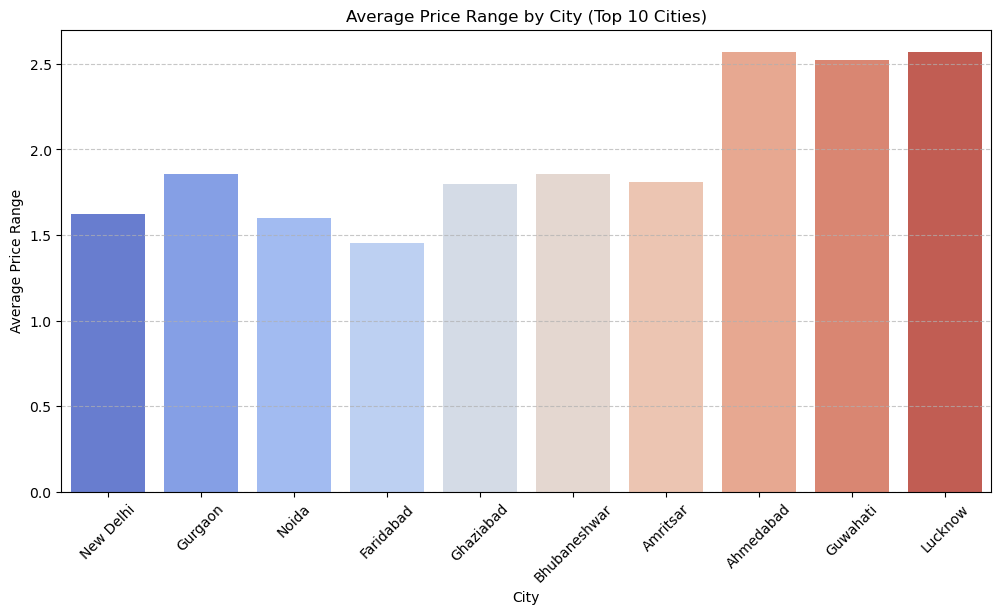

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average price range for top cities
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities_price, x="City", y="Avg_Price_Range", palette="coolwarm")

# Labels and title
plt.xlabel("City")
plt.ylabel("Average Price Range")
plt.title("Average Price Range by City (Top 10 Cities)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

